In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# Load Train Test Data
def load_data(stock_name):
    X_train = pd.read_csv(f"../data/tt_splits/X_train_{stock_name}.csv", parse_dates=["Date"], index_col="Date")
    X_test = pd.read_csv(f"../data/tt_splits/X_test_{stock_name}.csv", parse_dates=["Date"], index_col="Date")
    y_train = pd.read_csv(f"../data/tt_splits/y_train_{stock_name}.csv", parse_dates=["Date"], index_col="Date")
    y_test = pd.read_csv(f"../data/tt_splits/y_test_{stock_name}.csv", parse_dates=["Date"], index_col="Date")

    return X_train, X_test, y_train, y_test

# Load for all stocks
X_train_nvidia , X_test_nvidia , y_train_nvidia , y_test_nvidia = load_data("nvidia")
X_train_apple , X_test_apple , y_train_apple , y_test_apple = load_data("apple")
X_train_microsoft , X_test_microsoft , y_train_microsoft , y_test_microsoft = load_data("microsoft")

In [6]:
# Preprocess Data
def preprocess_data(X_train, X_test, y_train, y_test):
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()

    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)

    y_train_scaled = scaler_y.fit_transform(y_train)
    y_test_scaled = scaler_y.transform(y_test)

    # Reshape for LSTM (samples, time_steps, features)
    X_train_scaled = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
    X_test_scaled = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

    return X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, scaler_y

# Preprocess data for all stocks
X_train_nvidia_scaled, X_test_nvidia_scaled, y_train_nvidia_scaled, y_test_nvidia_scaled, scaler_nvidia = preprocess_data(X_train_nvidia, X_test_nvidia, y_train_nvidia, y_test_nvidia)
X_train_apple_scaled, X_test_apple_scaled, y_train_apple_scaled, y_test_apple_scaled, scaler_apple = preprocess_data(X_train_apple, X_test_apple, y_train_apple, y_test_apple)
X_train_microsoft_scaled, X_test_microsoft_scaled, y_train_microsoft_scaled, y_test_microsoft_scaled, scaler_microsoft = preprocess_data(X_train_microsoft, X_test_microsoft, y_train_microsoft, y_test_microsoft)

In [7]:
# Build LSTM Model
def build_lstm_model(input_shape):
    model = Sequential()
    # Bidirectional LSTM for richer feature extraction
    model.add(Bidirectional(LSTM(units=100, return_sequences=True, input_shape=input_shape)))
    model.add(Dropout(0.2))
    model.add(Bidirectional(LSTM(units=100, return_sequences=False)))
    model.add(Dropout(0.2))
    model.add(Dense(units=50, activation='relu'))
    model.add(Dense(units=1))  # Output layer
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss="mse")
    return model

# Define input shapes
input_shape = (X_train_nvidia_scaled.shape[1], X_train_nvidia_scaled.shape[2])

# Build models for all stocks
lstm_model_nvidia = build_lstm_model(input_shape)
lstm_model_apple = build_lstm_model(input_shape)
lstm_model_microsoft = build_lstm_model(input_shape)

Epoch 1/100
159/159 [==============================] - 18s 31ms/step - loss: 0.9998 - val_loss: 0.9615
Epoch 2/100
159/159 [==============================] - 3s 18ms/step - loss: 0.9985 - val_loss: 0.8853
Epoch 3/100
159/159 [==============================] - 2s 15ms/step - loss: 0.9967 - val_loss: 0.7853
Epoch 4/100
159/159 [==============================] - 2s 16ms/step - loss: 0.9938 - val_loss: 0.7918
Epoch 5/100
159/159 [==============================] - 2s 15ms/step - loss: 0.9908 - val_loss: 0.8903
Epoch 6/100
159/159 [==============================] - 3s 18ms/step - loss: 0.9866 - val_loss: 0.8240
Epoch 7/100
159/159 [==============================] - 3s 16ms/step - loss: 0.9846 - val_loss: 0.7089
Epoch 8/100
159/159 [==============================] - 2s 16ms/step - loss: 0.9855 - val_loss: 0.6956
Epoch 9/100
159/159 [==============================] - 2s 15ms/step - loss: 0.9873 - val_loss: 0.6986
Epoch 10/100
159/159 [==============================] - 3s 16ms/step - loss: 0.98

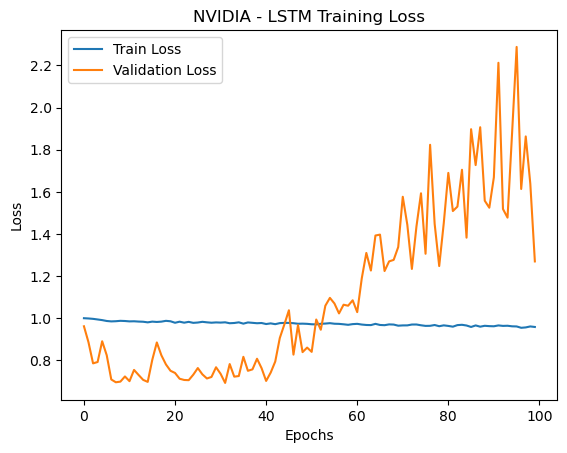

Epoch 1/100
274/274 [==============================] - 10s 18ms/step - loss: 1.0019 - val_loss: 0.3856
Epoch 2/100
274/274 [==============================] - 4s 13ms/step - loss: 0.9996 - val_loss: 0.3442
Epoch 3/100
274/274 [==============================] - 3s 13ms/step - loss: 0.9997 - val_loss: 0.3635
Epoch 4/100
274/274 [==============================] - 4s 13ms/step - loss: 0.9996 - val_loss: 0.3591
Epoch 5/100
274/274 [==============================] - 4s 13ms/step - loss: 0.9987 - val_loss: 0.3313
Epoch 6/100
274/274 [==============================] - 4s 13ms/step - loss: 0.9977 - val_loss: 0.3484
Epoch 7/100
274/274 [==============================] - 4s 16ms/step - loss: 0.9991 - val_loss: 0.3613
Epoch 8/100
274/274 [==============================] - 4s 14ms/step - loss: 0.9987 - val_loss: 0.3426
Epoch 9/100
274/274 [==============================] - 4s 14ms/step - loss: 0.9982 - val_loss: 0.3454
Epoch 10/100
274/274 [==============================] - 4s 14ms/step - loss: 0.99

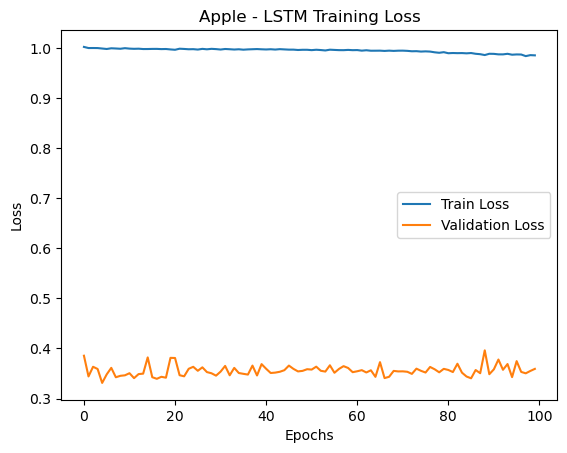

Epoch 1/100
241/241 [==============================] - 10s 20ms/step - loss: 0.9957 - val_loss: 0.5482
Epoch 2/100
241/241 [==============================] - 3s 14ms/step - loss: 0.9927 - val_loss: 0.5385
Epoch 3/100
241/241 [==============================] - 3s 14ms/step - loss: 0.9924 - val_loss: 0.5269
Epoch 4/100
241/241 [==============================] - 3s 13ms/step - loss: 0.9901 - val_loss: 0.5287
Epoch 5/100
241/241 [==============================] - 3s 14ms/step - loss: 0.9902 - val_loss: 0.5331
Epoch 6/100
241/241 [==============================] - 3s 14ms/step - loss: 0.9895 - val_loss: 0.5261
Epoch 7/100
241/241 [==============================] - 3s 14ms/step - loss: 0.9882 - val_loss: 0.5316
Epoch 8/100
241/241 [==============================] - 3s 14ms/step - loss: 0.9897 - val_loss: 0.5324
Epoch 9/100
241/241 [==============================] - 3s 14ms/step - loss: 0.9878 - val_loss: 0.6425
Epoch 10/100
241/241 [==============================] - 3s 13ms/step - loss: 0.98

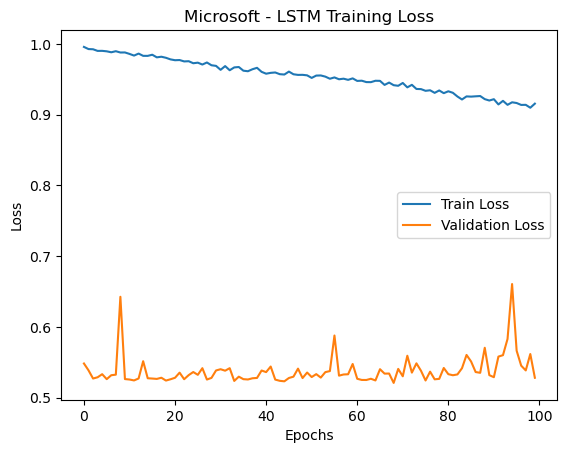

In [8]:
# Train the models
def train_lstm_model(model, X_train, y_train, X_test, y_test, stock_name, epochs=100, batch_size=32):
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=1)

    # Plot Training Loss
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.title(f"{stock_name} - LSTM Training Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

    return history

# Train LSTM models
history_nvidia = train_lstm_model(lstm_model_nvidia, X_train_nvidia_scaled, y_train_nvidia_scaled, X_test_nvidia_scaled, y_test_nvidia_scaled, "NVIDIA")
history_apple = train_lstm_model(lstm_model_apple, X_train_apple_scaled, y_train_apple_scaled, X_test_apple_scaled, y_test_apple_scaled, "Apple")
history_microsoft = train_lstm_model(lstm_model_microsoft, X_train_microsoft_scaled, y_train_microsoft_scaled, X_test_microsoft_scaled, y_test_microsoft_scaled, "Microsoft")

40/40 [==============================] - 1s 5ms/step

NVIDIA LSTM Model Performance
MSE: 0.010065
R² Score: -0.953362


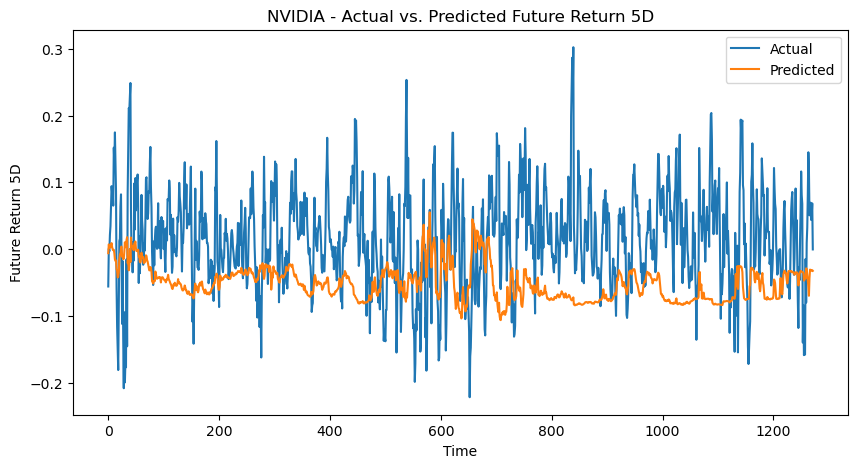

69/69 [==============================] - 2s 6ms/step

Apple LSTM Model Performance
MSE: 0.001545
R² Score: -0.086326


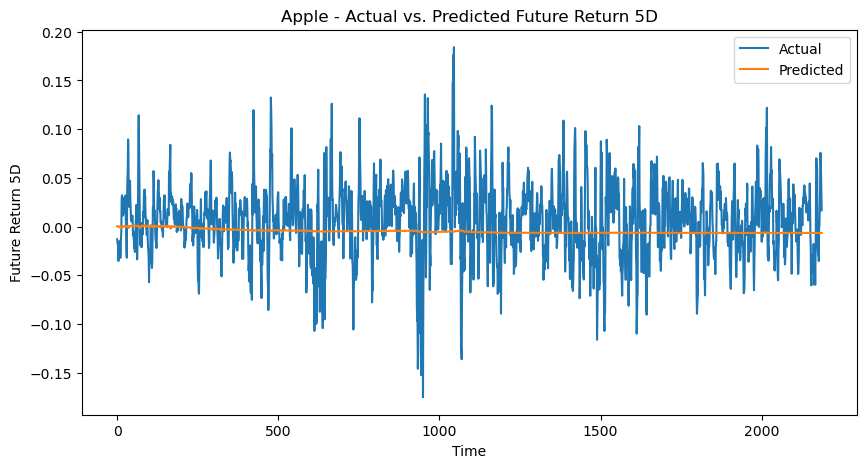

61/61 [==============================] - 1s 5ms/step

Microsoft LSTM Model Performance
MSE: 0.001130
R² Score: -0.001050


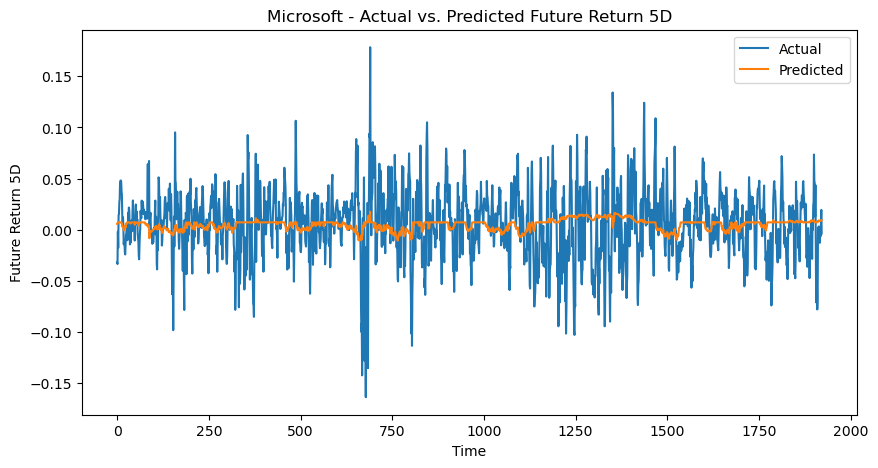

In [9]:
# Evaluate Models
def evaluate_model(model, X_test, y_test, scaler_y, stock_name):
    y_pred_scaled = model.predict(X_test)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    y_test_actual = scaler_y.inverse_transform(y_test)

    mse = mean_squared_error(y_test_actual, y_pred)
    r2 = r2_score(y_test_actual, y_pred)

    print(f"\n{stock_name} LSTM Model Performance")
    print(f"MSE: {mse:.6f}")
    print(f"R² Score: {r2:.6f}")

    # Plot Actual vs. Predicted
    plt.figure(figsize=(10, 5))
    plt.plot(y_test_actual, label="Actual")
    plt.plot(y_pred, label="Predicted")
    plt.title(f"{stock_name} - Actual vs. Predicted Future Return 5D")
    plt.xlabel("Time")
    plt.ylabel("Future Return 5D")
    plt.legend()
    plt.show()

    return mse, r2

# Evaluate models
mse_nvidia, r2_nvidia = evaluate_model(lstm_model_nvidia, X_test_nvidia_scaled, y_test_nvidia_scaled, scaler_nvidia, "NVIDIA")
mse_apple, r2_apple = evaluate_model(lstm_model_apple, X_test_apple_scaled, y_test_apple_scaled, scaler_apple, "Apple")
mse_microsoft, r2_microsoft = evaluate_model(lstm_model_microsoft, X_test_microsoft_scaled, y_test_microsoft_scaled, scaler_microsoft, "Microsoft")